In [2]:
import numpy
import pandas

from metrics import incom_not_weighted
import matplotlib.pyplot as plt

from process import load_data, transform_multipliers
from transformator import Multiplier

df = load_data()
delta = df['delta']
dft = transform_multipliers(df)
M = Multiplier
columns = ["P/E", "E/P", "P/B", "P/S", "P/CF", "L/A", "NetDebt / EBITDA", "EV / EBITDA", "ROA", "ROE", "ROS", "delta"]


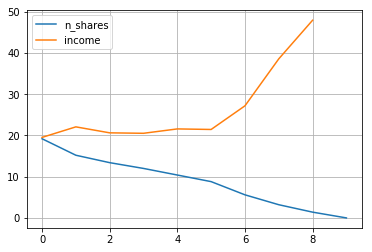

In [3]:
lens = []
incomss = []
for i in range(0, 100, 10):
    indexes = (dft[M.p_to_b] > i) & (dft[M.netDebt_to_ebitda] > 50)
    incoms = delta[indexes]
    lens.append(len(incoms))
    incomss.append(numpy.mean(incoms))
df_inc = pandas.DataFrame()
df_inc['n_shares'] = [l/5 for l in lens]
df_inc['income'] = incomss
df_inc.plot(grid=True)
plt.show()